<a href="https://colab.research.google.com/github/DanielLimaC/TeleconX_BR_DanielLima/blob/main/TeleconX_BR_DanielLima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOBRE

## **Telecom $X$ - Análise de Evasão de Clientes**
_______

Você foi contratado como assistente de análise de dados na Telecom X e fará parte do projeto "Churn de Clientes". A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

Seu desafio será coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos. A partir da sua análise, os demais colegas da  equipe de Data Science poderá avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import warnings

## Extração de Dados

In [24]:
# Dados estão no formato JSON

tele_x = pd.read_json("https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json")

tele_x.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [25]:
# Ignorar warnings de regex para manter a saída limpa
warnings.filterwarnings('ignore')

# ---------------------------------------------------------
# 1. Definição de Funções Auxiliares
# ---------------------------------------------------------
def caracteristicas(dataset):
    print("--- Resumo do Dataset ---")
    print(f'Tamanho: {dataset.shape}\n')
    print(f'Colunas: {dataset.columns}\n')
    print(f'Informações: {dataset.info()}\n')
    print(f'Descrição: {dataset.describe()}\n')
    print(f'Valores nulos:\n{dataset.isnull().sum()}\n')
    print("-------------------------\n")

# ---------------------------------------------------------
# 2. Carregamento e Normalização dos Dados
# ---------------------------------------------------------
print("Carregando dados...")
response = requests.get("https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json")
data = response.json()

# "Achata" o JSON para que cada chave vire uma coluna individual
df = pd.json_normalize(data)

# ---------------------------------------------------------
# 3. Limpeza dos Nomes das Colunas
# ---------------------------------------------------------
# Lista de prefixos que você deseja remover
prefixos = ['customer.', 'phone.', 'internet.', 'account.']

# Remove os prefixos das colunas usando Regex
df.columns = df.columns.str.replace(r'|'.join(prefixos), '', regex=True)

print("Colunas renomeadas com sucesso.")

# ---------------------------------------------------------
# 4. Tratamento de Strings Vazias e Valores Nulos
# ---------------------------------------------------------
# Substitui as strings vazias por NaN em todo o DataFrame
# (Valor vazio '' é diferente de valor nulo/NaN)
df.replace('', np.nan, inplace=True)

# Remove apenas as linhas onde a coluna Churn está vazia (NaN)
linhas_antes = df.shape[0]
df = df.dropna(subset=['Churn'])
linhas_depois = df.shape[0]

print(f"Linhas removidas (Churn nulo): {linhas_antes - linhas_depois}")

# ---------------------------------------------------------
# 5. Transformação de Dados (Mapeamento)
# ---------------------------------------------------------
mapeamento = {0: 'No', 1: 'Yes'}

# Aplicamos à coluna SeniorCitizen
df['SeniorCitizen'] = df['SeniorCitizen'].map(mapeamento)

# ---------------------------------------------------------
# 6. Verificações Finais
# ---------------------------------------------------------
print("\n=== Verificação Final ===")

# Verifica os valores únicos de Churn e SeniorCitizen para confirmar as mudanças
print(f"Valores únicos em 'Churn': {df['Churn'].unique()}")
print(f"Valores únicos em 'SeniorCitizen': {df['SeniorCitizen'].unique()}")

# Chama a função de características criada anteriormente para visão geral
caracteristicas(df)

# Retorna o número total de valores diferentes por coluna
print("Contagem de valores únicos por coluna:")
print(df.nunique())

Carregando dados...
Colunas renomeadas com sucesso.
Linhas removidas (Churn nulo): 224

=== Verificação Final ===
Valores únicos em 'Churn': ['No' 'Yes']
Valores únicos em 'SeniorCitizen': ['No' 'Yes']
--- Resumo do Dataset ---
Tamanho: (7043, 21)

Colunas: Index(['D', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Charges.Monthly', 'Charges.Total'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   D                 7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 no

#📊 Carga e análise

Resumo Estatístico (Numérico):
            tenure  Charges.Monthly
count  7043.000000      7043.000000
mean     32.371149        64.761692
std      24.559481        30.090047
min       0.000000        18.250000
25%       9.000000        35.500000
50%      29.000000        70.350000
75%      55.000000        89.850000
max      72.000000       118.750000

Gerando gráficos de variáveis categóricas...


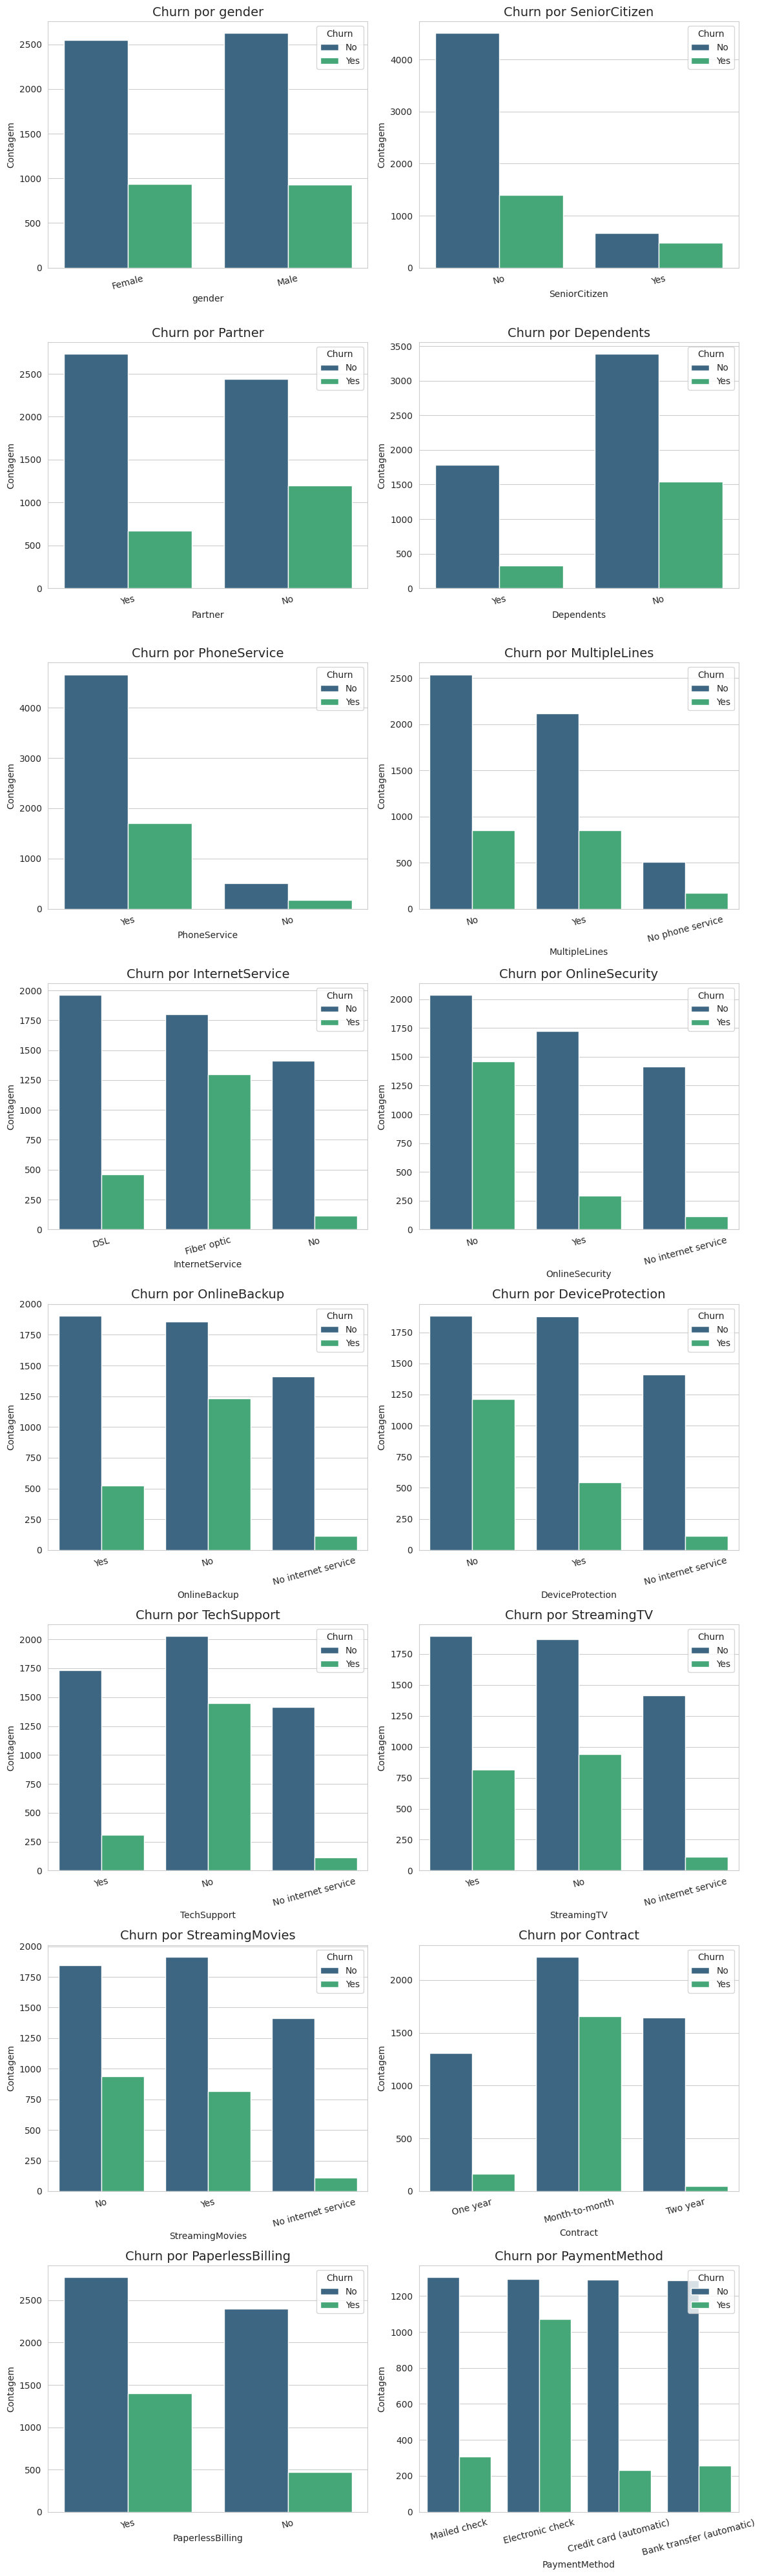

In [26]:
# ==========================================
# Análise Exploratória de Dados (EDA)
# ==========================================

# --- 1. Estatísticas Descritivas ---
print("Resumo Estatístico (Numérico):")
# Exibe resumo estatístico das colunas numéricas
print(df.describe())

# --- 2. Visualização: Categóricas vs. Churn ---
print("\nGerando gráficos de variáveis categóricas...")

# Identifica colunas categóricas (com menos de 10 valores únicos), ignorando 'Churn' e 'id'
colunas_categoricas = [col for col in df.columns if df[col].nunique() < 10 and col not in ['Churn', 'id']]

# Configura as dimensões da grade de gráficos
n_cols = 2
n_rows = (len(colunas_categoricas) + n_cols - 1) // n_cols

plt.figure(figsize=(12, n_rows * 5)) # Aumentei levemente a largura para melhor visualização

# Loop para gerar um gráfico para cada coluna categórica identificada
for i, coluna in enumerate(colunas_categoricas):
    plt.subplot(n_rows, n_cols, i + 1)
    # Gráfico de contagem dividido pelo status de Churn
    sns.countplot(data=df, x=coluna, hue='Churn', palette='viridis')
    plt.title(f'Churn por {coluna}', fontsize=14)
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    plt.legend(title='Churn')
    plt.xticks(rotation=15) # Rotaciona rótulos para evitar sobreposição

# Ajusta o layout e exibe
plt.tight_layout()
plt.show()

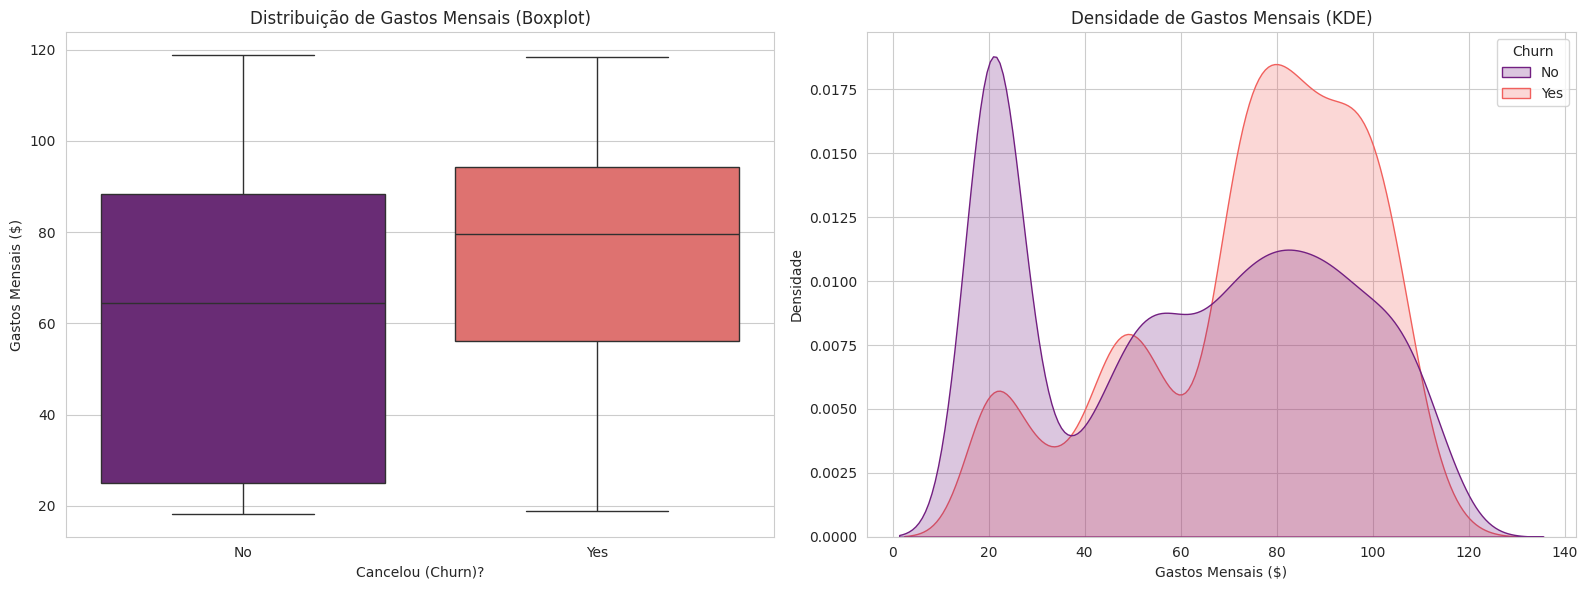


Insights - Gastos Mensais:
1. Clientes com planos econômicos tendem a permanecer.
2. Clientes com contas altas têm maior propensão ao cancelamento (Churn).
3. Ponto crítico de perda de clientes inicia-se aproximadamente em $70,00.



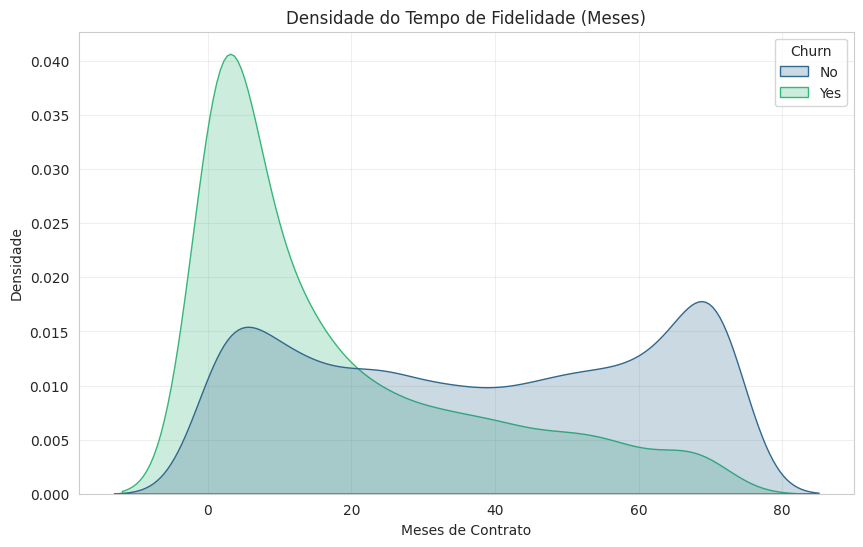


Insights - Fidelidade (Tenure):
1. A maior taxa de desistência ocorre nos primeiros meses de relacionamento (Curva amarela alta no início).
2. Clientes que superam o período inicial tendem a se estabilizar.



In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo geral
sns.set_style("whitegrid")

# ==========================================
# 3. Análise de Gastos Mensais (Charges.Monthly)
# ==========================================

# Criando uma figura com 2 gráficos lado a lado para melhor comparação
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Boxplot (Ótimo para ver outliers e medianas)
sns.boxplot(data=df, x='Churn', y='Charges.Monthly', palette='magma', ax=axes[0])
axes[0].set_title('Distribuição de Gastos Mensais (Boxplot)')
axes[0].set_xlabel('Cancelou (Churn)?')
axes[0].set_ylabel('Gastos Mensais ($)')

# Gráfico 2: KDE Plot (Ótimo para ver a "mancha" de concentração dos dados)
sns.kdeplot(data=df, x='Charges.Monthly', hue='Churn', fill=True, common_norm=False, palette='magma', ax=axes[1])
axes[1].set_title('Densidade de Gastos Mensais (KDE)')
axes[1].set_xlabel('Gastos Mensais ($)')
axes[1].set_ylabel('Densidade')

plt.tight_layout()
plt.show()

print("""
Insights - Gastos Mensais:
1. Clientes com planos econômicos tendem a permanecer.
2. Clientes com contas altas têm maior propensão ao cancelamento (Churn).
3. Ponto crítico de perda de clientes inicia-se aproximadamente em $70,00.
""")

# ==========================================
# 4. Análise de Fidelidade (Tenure)
# ==========================================

plt.figure(figsize=(10, 6))

# KDE Plot para tempo de contrato
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, common_norm=False, palette='viridis')

plt.title('Densidade do Tempo de Fidelidade (Meses)')
plt.xlabel('Meses de Contrato')
plt.ylabel('Densidade')
plt.grid(True, alpha=0.3) # Adiciona grade suave
plt.show()

print("""
Insights - Fidelidade (Tenure):
1. A maior taxa de desistência ocorre nos primeiros meses de relacionamento (Curva amarela alta no início).
2. Clientes que superam o período inicial tendem a se estabilizar.
""")

#📄Relatorio Final

1. PRINCIPAIS ACHADOS NA ANÁLISE DE DADOS
-------------------------------------------------------
Os dados revelaram padrões comportamentais claros:

[PERFIL]
- Clientes sem dependentes abandonam com facilidade.
- Clientes com contrato MENSAL têm altíssima taxa de cancelamento.

[SERVIÇOS]
- Fibra Óptica: Clientes com este serviço cancelam mais (possível problema técnico ou expectativa).
- Segurança & Suporte: A ausência destes serviços aumenta drasticamente a evasão.
- Telefonia: Atua como retentor (quem tem, fica mais).

[FINANCEIRO]
- Pagamento: Cheque eletrônico tem alta correlação com cancelamento.
- Preço: O risco de churn dispara quando a fatura passa de R$ 70,00.

[TEMPO]
- A maior perda de clientes ocorre nos primeiros meses (falha no Onboarding).

2. SUGESTÕES ESTRATÉGICAS
-------------------------------------------------------

A. PRODUTO E VALOR
   > Realizar auditoria na rede de Fibra Óptica e enviar guias de uso.
   > Incluir Segurança Online e Suporte Prioritário como "padrão" nos planos de Fibra,
     aumentando a percepção de valor sem aumentar o preço base visivelmente.

B. PREÇO E FIDELIZAÇÃO
   > Migração de Contratos: Oferecer 1º mês grátis para quem sair do mensal para o anual.
   > Barreira dos R$ 70: Planos acima desse valor devem ter benefícios extras obrigatórios
     (ex: streaming ou dobro de velocidade) para justificar o custo.

C. EXPERIÊNCIA (ONBOARDING)
   > Criar régua de comunicação de 90 dias para evitar o abandono inicial.
   > Incentivar titulares "solo" a adicionarem dependentes (linhas familiares).

D. PAGAMENTOS
   > Oferecer desconto (ex: R$ 5,00) para migração de Cheque Eletrônico para
     Débito Automático ou Cartão de Crédito.
"""

print(relatorio)